In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import mean_squared_error
from math import sqrt

### Importing dataset file from data folder

In [2]:
df = pd.read_csv('data/folds5_pp.csv')

## Renaming target column 'PE' to 'EP' according to dataset feature definition

In [3]:
df.rename(columns={'PE':'EP'}, inplace=True)
df

,AT,V,AP,RH,EP
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


## Histograms are showing most of the features from the dataset are forming shape closer to normal distribution

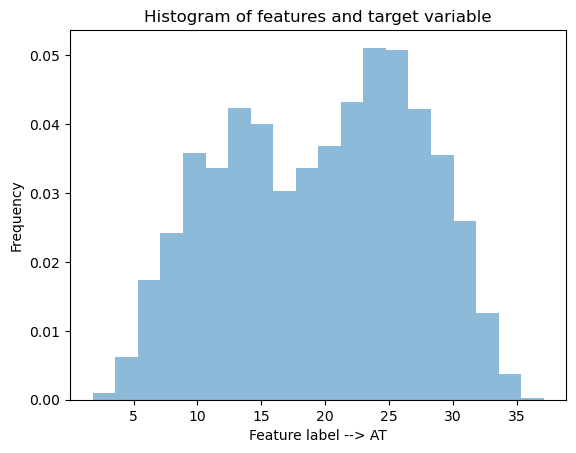

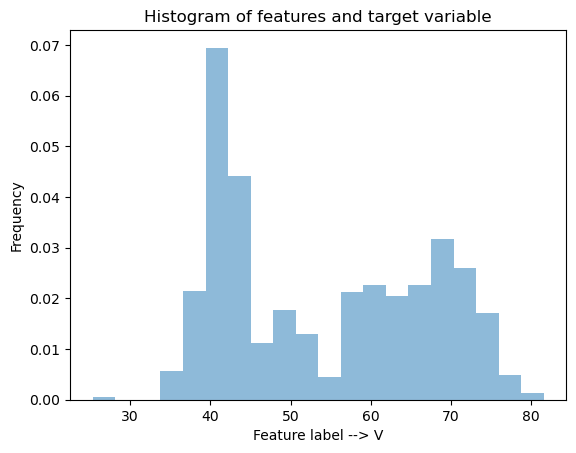

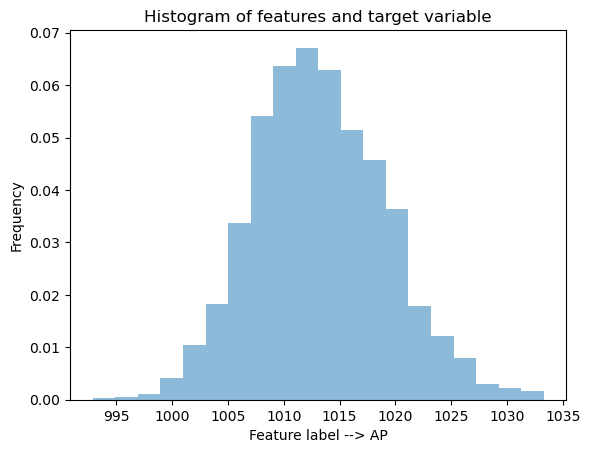

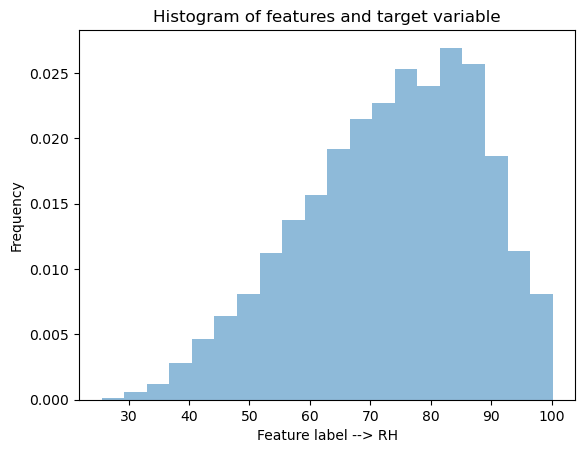

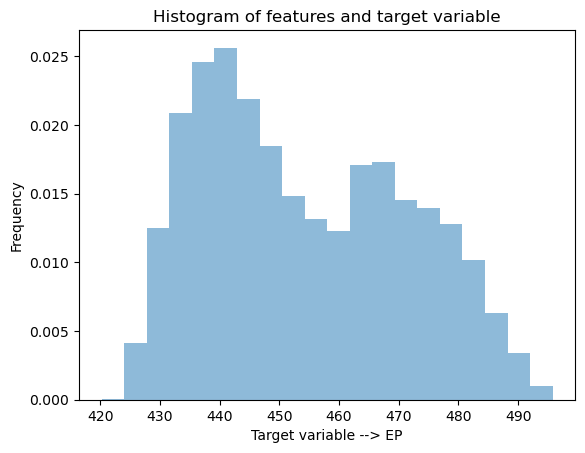

In [4]:
for val in df.columns:
    plt.hist(df[val], bins=20, density=True, alpha=0.5)
    filename = 'regression_histo_' + val
    plt.title("Histogram of features and target variable")
    if val == 'EP':
        plt.xlabel("Target variable --> " + val)
    else:
        plt.xlabel("Feature label --> " + val)
    plt.ylabel('Frequency')
    plt.savefig('plots/' + filename + '.png', dpi=300, bbox_inches='tight')
    plt.show()



## Correlation results are showing high correlation between 'AT' and 'V' while others are showing moderate correlation but on negative side

In [5]:
print(df.corr())

          AT         V        AP        RH        EP
AT  1.000000  0.844107 -0.507549 -0.542535 -0.948128
V   0.844107  1.000000 -0.413502 -0.312187 -0.869780
AP -0.507549 -0.413502  1.000000  0.099574  0.518429
RH -0.542535 -0.312187  0.099574  1.000000  0.389794
EP -0.948128 -0.869780  0.518429  0.389794  1.000000


## Performing Log transformation for column 'AP' due to relatively huge values

In [6]:
df.AP = np.log(df.AP)

In [7]:
df

,AT,V,AP,RH,EP
0,8.34,40.77,6.918537,90.01,480.48
1,23.64,58.49,6.919091,74.20,445.75
2,29.74,56.90,6.914880,41.91,438.76
3,19.07,49.69,6.914949,76.79,453.09
4,11.80,40.66,6.924740,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,6.919486,72.93,462.59
9564,33.41,77.95,6.918003,59.72,432.90
9565,15.99,43.34,6.921855,78.66,465.96
9566,17.65,59.87,6.926165,94.65,450.93


### No missing value in the dataset

In [23]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
EP    0
dtype: int64

## Scatter matrix showing good linear correlations overall e.g. 'AT' and 'V'. Moderate with 'AP' and 'RH'

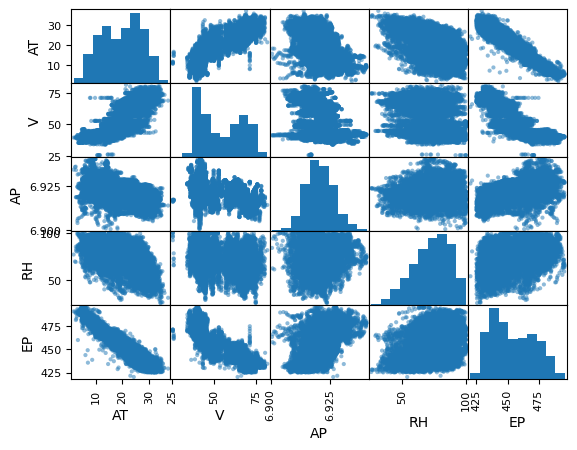

In [8]:
scatter_matrix(df)
filename = 'regression_scatter_matrix_'
plt.savefig('plots/'+filename + '.png', dpi=300, bbox_inches='tight')
plt.show()

### Separating X,y from the dataset

In [9]:
X = df.drop(['EP'], axis='columns')
y = df.EP

In [10]:
X

,AT,V,AP,RH
0,8.34,40.77,6.918537,90.01
1,23.64,58.49,6.919091,74.20
2,29.74,56.90,6.914880,41.91
3,19.07,49.69,6.914949,76.79
4,11.80,40.66,6.924740,97.20
...,...,...,...,...
9563,15.12,48.92,6.919486,72.93
9564,33.41,77.95,6.918003,59.72
9565,15.99,43.34,6.921855,78.66
9566,17.65,59.87,6.926165,94.65


# Applying Linear regression model

In [11]:
# Setting up Linear regression model and splitting data

model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Calculating values including R^2

print('intercept:', model.intercept_)
print('slopes:', model.coef_)
print('R squared:', model.score(X,y))

intercept: 28.981114732538742
slopes: [-1.97361501 -0.23231801 70.56139009 -0.1580358 ]
R squared: 0.9286902951825017


### R squared is ~93%, reasonably good model. Negative coefficient for AT, V and RH while it's positive for AP.

# Making Predictions

In [13]:
y_hat = model.predict(X_test)
print(X_test.head())
print()
print('y_hat', y_hat)

         AT      V        AP     RH
5014  17.80  43.72  6.916428  78.50
6947  29.60  71.14  6.919150  52.69
9230  11.06  36.71  6.929194  80.44
4290  30.06  67.25  6.925232  53.59
6477  19.88  47.03  6.919951  91.99

y_hat [459.32075706 433.93295073 474.84568685 ... 477.9137723  437.06757989
 456.44320753]


In [14]:
print(mean_squared_error(y_test, y_hat, squared= False))
print('RMSE using MSE', sqrt(mean_squared_error(y_test, y_hat, squared=False)))

4.48103856376603
RMSE using MSE 2.1168463722637103


## Plot of Actual vs Predictions

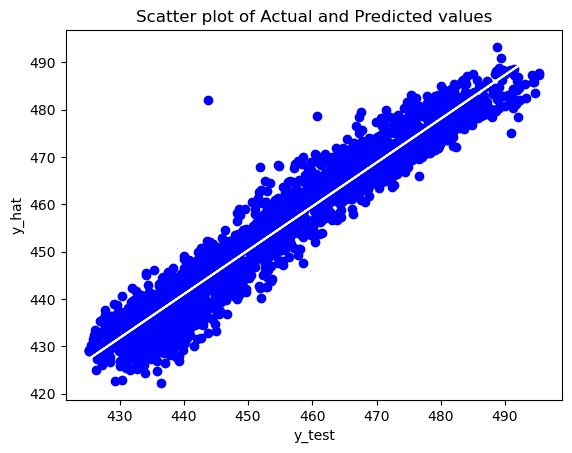

In [15]:
plot_y_test = y_test.to_list()
plot_y_hat = y_hat.tolist()

coefficients = np.polyfit(plot_y_test, plot_y_hat, 1)
poly = np.poly1d(coefficients)

plt.scatter(plot_y_test, plot_y_hat, color='blue')
plt.plot(plot_y_test, poly(plot_y_test), color='white', label='Fit Line')
plt.xlabel("y_test")
plt.ylabel("y_hat")
plt.title("Scatter plot of Actual and Predicted values")
filename = 'regression_scatter_plot_'
plt.savefig('plots/'+filename + '.png', dpi=300, bbox_inches='tight')
plt.show()

## Adding second-degree polynomial (quadratic) to see if it improves the model score

In [16]:
df.head()

,AT,V,AP,RH,EP
0,8.34,40.77,6.918537,90.01,480.48
1,23.64,58.49,6.919091,74.20,445.75
2,29.74,56.90,6.914880,41.91,438.76
3,19.07,49.69,6.914949,76.79,453.09
4,11.80,40.66,6.924740,97.20,464.43


In [17]:
# Taking two features 'AT' and 'V' and squaring those

X['AT_sqr'] = np.square(df.AT)
X['V_sqr'] = np.square(df.V)
#X['AP_sqr'] = np.square(df.AP)
#X['RH_sqr'] = np.square(df.RH)

In [18]:
X

,AT,V,AP,RH,AT_sqr,V_sqr
0,8.34,40.77,6.918537,90.01,69.5556,1662.1929
1,23.64,58.49,6.919091,74.20,558.8496,3421.0801
2,29.74,56.90,6.914880,41.91,884.4676,3237.6100
3,19.07,49.69,6.914949,76.79,363.6649,2469.0961
4,11.80,40.66,6.924740,97.20,139.2400,1653.2356
...,...,...,...,...,...,...
9563,15.12,48.92,6.919486,72.93,228.6144,2393.1664
9564,33.41,77.95,6.918003,59.72,1116.2281,6076.2025
9565,15.99,43.34,6.921855,78.66,255.6801,1878.3556
9566,17.65,59.87,6.926165,94.65,311.5225,3584.4169


In [19]:
# Setting up Linear regression model and splitting data

model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
model.fit(X_train, y_train)

LinearRegression()

In [20]:
# Calculating values including R^2

print('intercept:', model.intercept_)
print('slopes:', model.coef_)
print('R squared:', model.score(X,y))

intercept: -219.49860923545344
slopes: [-2.89776564e+00 -3.93386198e-01  1.07733504e+02 -1.18069329e-01
  2.77680140e-02  9.42938880e-04]
R squared: 0.9357128314604478


## R^2 has gone up by inctroducing polynomial with 2-features

In [21]:
y_sqr_hat = model.predict(X_test)

In [22]:
print(mean_squared_error(y_test, y_sqr_hat, squared= False))

4.274693489056394


### MSE has gone down a bit, from 4.48 to 4.27